# CNN (MNIST)
## 1. Library, Data Preprocessing 
## 2. Solve classification with Pytorch
## 3. Show the result 

# Library

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dataset # for loading dataset (mnist)
import torchvision.transforms as transforms # for processing datasets
from torch.utils.data import DataLoader # for making dataset easier to use 

from matplotlib import pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device: gpu") if torch.cuda.is_available() else print("device: cpu")

device: gpu


# Hyper parameter setting

In [5]:
# hypter parameter setting
learning_rate = 1e-1 ###
epochs = 50 ###
display_step = 10
batch_size = 32 #

activation = nn.ReLU()
max_pool = nn.MaxPool2d(2,2) # kerel size, stride size, padding size 

# Load data & Pre-process data

len(train_data):  60000
len(test_data):  10000
data tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
     

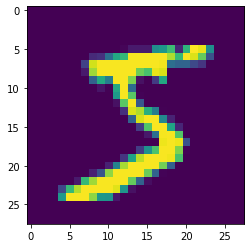

data shape: torch.Size([32, 1, 28, 28])
label: tensor([3, 8, 4, 7, 9, 6, 4, 8, 2, 2, 5, 1, 7, 1, 9, 7, 0, 4, 4, 3, 3, 6, 7, 0,
        9, 7, 5, 2, 1, 5, 1, 4])


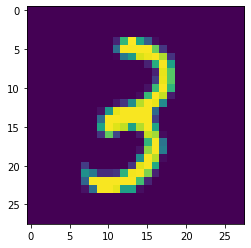

In [6]:
# load data
train_data = dataset.MNIST("./", train = True, transform = transforms.ToTensor(), target_transform = None, download = True)
test_data = dataset.MNIST("./", train = False, transform = transforms.ToTensor(), target_transform = None, download = True)

# check the data
print('len(train_data): ', len(train_data))
print('len(test_data): ', len(test_data))

x_train, y_train = train_data[0]
print('data', x_train)
print('data shape: ', x_train.shape)
print('label: ', y_train)

plt.figure()
plt.imshow(x_train[0])
plt.show()

# Pre-process (batch, shuffle)
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)

# check the data 
examples = enumerate(train_loader)
batch_idx, (example_data, example_target) = next(examples)

print('data shape:', example_data.shape)
print('label:', example_target)

plt.figure()
plt.imshow(example_data[0][0])
plt.show()

# Model & Optimization and Loss function

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__() # for initializing nn.Module (parent class)
        self.feature_extraction = nn.Sequential(
            # 합성곱(nn.Cov2d) + 활성화 함수(activation = nn.ReLU)를 하나의 합성곱 층으로 본다.
            # 맥스풀링(nn.MaxPoold2d)은 풀링 층으로 별도로 구분.
            
#             self.conv1 = nn.Conv2d(1, 16, 5)
#             self.act1 = activation # shape가 어떻게 바뀌는지 일일히 확인하기 위해 변수 안에 넣어두기
            
            # 1 x 28 x 28
            
            nn.Conv2d(1, 16, 5), # number of input channel, number of output channel, kernel size   
            
            # 16 x 24x 24
            
            activation,          # we can set stride size and padding size. if we do not set the these parameters, default value is 1, 0.
            nn.Conv2d(16, 32,5),
            
            # 32 x 20 x 20
            
            activation,
            
            max_pool,
            
            # 32 x 10 x 10 
            
            nn.Conv2d(32,64,5),
            activation,
            
            max_pool
        )
        self.classifier = nn.Sequential(
#             print(conv1 )
            nn.Linear(64 * 3 * 3, 100),
            activation,
            nn.Linear(100, 10)
        )
    def forward(self, x):
        extracted_feature = self.feature_extraction(x) # [32, 64, 3, 3]
        flatten = extracted_feature.view(batch_size, -1) # [32, 576 (64 * 3 * 3)]
        result = self.classifier(flatten)
        return result


model = CNN().to(device) #모델 생성
model.train() # 모델 학습
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate) # SGD모델 사용

# Train & Test

In [9]:
loss_array = []

# train the model 모델을 학습해보자
for i in range(epochs):
    for index, [data, label] in enumerate(train_loader):
        data = data.to(device)
        label = label.to(device)
                
        optimizer.zero_grad()
        output = model.forward(data)
        loss = loss_function(output, label)
        loss.backward()
        optimizer.step()
        
    if i % display_step == 0:
        print('{} epoch loss: {}'.format(i,loss))
        loss_array.append(loss.cpu().detach().numpy())

0 epoch loss: 0.008009134791791439
10 epoch loss: 6.324761488940567e-05
20 epoch loss: 3.3900016660481924e-07
30 epoch loss: 8.246704055636656e-06
40 epoch loss: 2.4413469873252325e-05


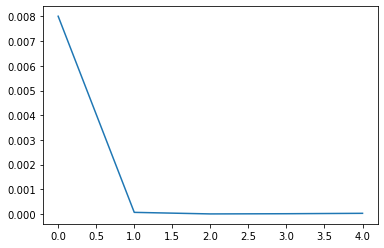

In [10]:
plt.figure()
plt.plot(loss_array)
plt.show()

In [11]:
#test the model
model.eval()
correct = 0
total = 0

prediction_list = []
label_list = []

with torch.no_grad():
    for index, [data, label] in enumerate(test_loader):
        data = data.to(device)
        label = label.to(device)
        
        output = model.forward(data)
        _, prediction_index = torch.max(output, 1)
        
        prediction_list.append(prediction_index)
        label_list.append(label)
        
        total += label.size(0)
        correct += (prediction_index == label).sum().float()

    print("Accuracy of the model: {}".format(correct/total))


Accuracy of the model: 0.9934896230697632


# Advanced: Learning rate scheduler

/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


0 epoch lr: [0.09801]
0 epoch loss: 2.8459926397772506e-06


/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:351: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


10 epoch lr: [0.08863848717161292]
10 epoch loss: 0.0
20 epoch lr: [0.08016305895390458]
20 epoch loss: 1.0467894071553019e-06
30 epoch lr: [0.07249803359578533]
30 epoch loss: 0.0
40 epoch lr: [0.06556592205741435]
40 epoch loss: 1.9743976054087398e-07


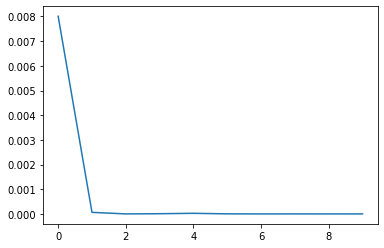

Accuracy of the model: 0.9936898946762085


In [12]:
# learning rate scheduler
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 1, gamma = 0.99)  
# this function decreast learning for each step size
# 스텝 사이즈마다 러닝 레이트를 줄인다
# optim에 다 들어가있음

for i in range(epochs):
    scheduler.step()
    for index, [image, label] in enumerate(train_loader):
        x = image.to(device)
        y = label.to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_function(output, y)
        loss.backward()
        optimizer.step()
        
        
    if i % display_step ==0:
        print('{} epoch lr: {}'.format(i,scheduler.get_lr()))
        print('{} epoch loss: {}'.format(i,loss))
        loss_array.append(loss.cpu().detach().numpy())

#plot the loss  
plt.figure()
plt.plot(loss_array)
plt.show()            

#test the model
correct = 0
total = 0
with torch.no_grad():
    for index, [data, label] in enumerate(test_loader):
        data = data.to(device)
        label = label.to(device)
        
        output = model.forward(data)
        _, result = torch.max(output, 1)
        
        total += label.size(0)
        correct += (result == label).sum().float()

    print("Accuracy of the model: {}".format(correct/total))